# Multiple linear regression

In [2]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y =  [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(X, y)

X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))

print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]
R-squared: 0.77


## Polynomial regression

A special case of multiple linear regression that models a linear relationship between the response variable and polynomial feature terms.

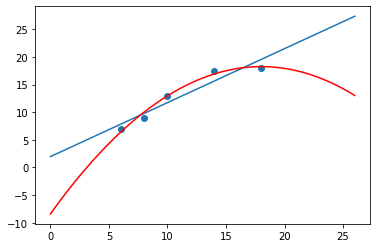

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='-')
plt.scatter(X_train, y_train)
plt.show()

## Gradient descent

In [17]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('Cross validation r-squared scores: %s' % scores)
print('Average cross validation r-squared score: %s' % np.mean(scores))

regressor.fit(X_train, y_train)
print('Test set r-squared score %s' % regressor.score(X_test))

Cross validation r-squared scores: [0.5912239  0.69113418 0.78706505 0.82947908 0.74979934]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin